In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [3]:
df = pd.DataFrame({
    'Age': [20,16.2,20.2,18.8,18.9,16.7,13.6,20.0,18.0,21.2,
           25,31.2,25.2,23.8,23.9,21.7,18.6,25.0,23.0,26.2],
    'Experience': [2.3,2.2,1.8,1.4,3.2,3.9,1.4,1.4,3.6,4.3,
            4.3,4.2,3.8,3.4,5.2,5.9,3.4,3.4,5.6,6.3],
    'Badass': [0,0,0,0,0,0,0,0,0,1,
            1,1,1,1,1,1,0,1,1,1]
})
df

,Age,Experience,Badass
0,20.0,2.3,0
1,16.2,2.2,0
2,20.2,1.8,0
3,18.8,1.4,0
4,18.9,3.2,0
5,16.7,3.9,0
6,13.6,1.4,0
7,20.0,1.4,0
8,18.0,3.6,0
9,21.2,4.3,1


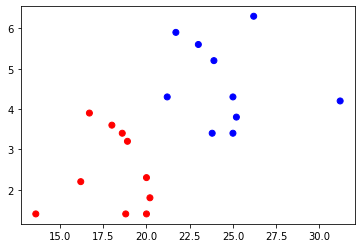

In [4]:
colors = np.full_like(df['Badass'], 'red', dtype='object')
colors[df['Badass'] == 1] = 'blue'

plt.scatter(df['Age'], df['Experience'], color=colors)

In [5]:
X = df.drop('Badass', axis=1)
Y = df['Badass']

print(X.shape, Y.shape)

(20, 2) (20,)


## Using sklearn

In [6]:
from sklearn import svm

In [7]:
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [8]:
# View support vectors
model.support_vectors_

array([[20. ,  2.3],
       [18.9,  3.2],
       [21.2,  4.3]])

In [9]:
# View indices of support vectors
model.support_

array([0, 4, 9], dtype=int32)

In [10]:
# View number of support vectors for each class
model.n_support_

array([2, 1], dtype=int32)

In [11]:
# Get the separating hyperplane
print(model.coef_, model.intercept_)

[[0.54860245 0.67084429]] [-13.51509414]


### Plot

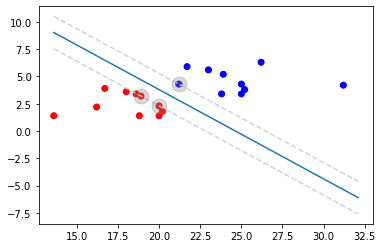

In [12]:
def plot_decision_boundary(X, coef, intercept, v):

    # Draw points
    plt.scatter(X[:,0], X[:,1], color=colors)

    a = -coef[0]/coef[1]
    b = -intercept/coef[1]

    # Draw hyperplane with margin
    _X = np.arange(X[:,0].min(), X[:,0].max()+1, .1)
    _Y = _X * a + b

    margin  = 1 / np.sqrt(np.sum(coef**2))
    _Y_down = _Y - np.sqrt(1 + a**2) * margin
    _Y_up   = _Y + np.sqrt(1 + a**2) * margin

    plt.plot(_X, _Y)
    plt.plot(_X, _Y_down, linestyle='--', color='lightgrey')
    plt.plot(_X, _Y_up,   linestyle='--', color='lightgrey')

    # Highlight support vectors
    plt.plot(v[:,0], v[:,1],
             marker='o', markersize=15,
             linewidth=0,
             color='grey', alpha=0.3)
    plt.show()

plot_decision_boundary(
    X.values,
    model.coef_[0],
    model.intercept_[0],
    model.support_vectors_
)

### Plot using contour

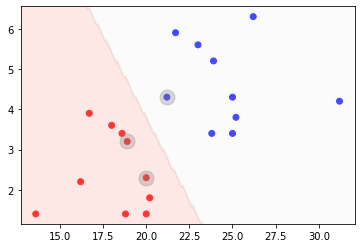

In [13]:
def predict(X):
    return model.predict(X)

def plot_contour(X, v):

    # Draw points
    plt.scatter(X[:,0], X[:,1], color=colors)

    x_min, x_max = plt.gca().get_xlim()
    y_min, y_max = plt.gca().get_ylim()

    # Highlight support vectors
    plt.plot(v[:,0], v[:,1],
             marker='o', markersize=15,
             linewidth=0,
             color='grey', alpha=0.3)
    
    # Draw contour
    xx, yy = np.meshgrid(np.arange(x_min, x_max+.1, .1),
                         np.arange(y_min, y_max+.1, .1))

    Z = predict(np.c_[xx.ravel(), yy.ravel()]) \
            .reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.3)

plot_contour(X.values, model.support_vectors_)

In [14]:
predict([X.loc[0]])

array([0])

---

## From scratch

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [16]:
_X = scaler.fit_transform(X)
_Y = Y.replace(0,-1).values

In [21]:
def fit(X, y, C = 1.0, alpha=1e-3, epochs=500):

    # Initialize weights
    w = np.random.randn(X.shape[1])
    b = 0

    for _ in range(epochs):
        margin = y * (X.dot(w) + b)

        pts_idx = np.where(margin < 1)[0]
        dw = w - C * y[pts_idx].dot(X[pts_idx])
        w -= alpha * dw

        db = - C * np.sum(y[pts_idx])
        b -= alpha * db

    margin = y * (X.dot(w) + b)
    support_ = np.where(margin <= 1)[0]

    return w, b, support_

coef_, intercept_, support_ = fit(_X, _Y)

print(coef_, intercept_, support_)

[1.4368838  0.66372392] 0.057000000000000044 [ 4  9 13]


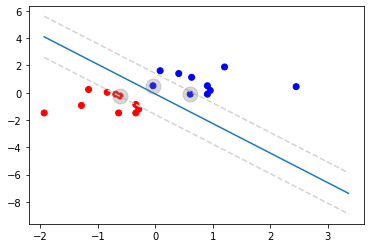

In [22]:
plot_decision_boundary(
    _X,
    coef_,
    intercept_,
    _X[support_]
)

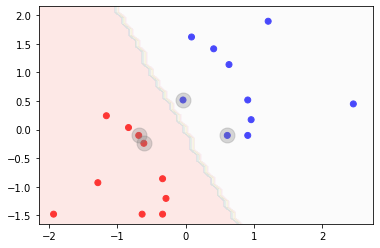

In [19]:
def predict(X):
    return np.sign(X.dot(coef_) + intercept_)

plot_contour(_X, _X[support_])

In [20]:
predict(np.array([_X[0]]))

array([-1.])